In [148]:
import pandas as pd
from os import listdir
from pandas.errors import EmptyDataError
from unidecode import unidecode
import seaborn as sns

sns.set(
    rc = {
        'figure.figsize': (10, 8)
    }
)

# Read data

## Wyborcza

In [61]:
wyborcza_articles = []
for filename in listdir('data/wyborcza/articles'):
    wyborcza_articles.append(pd.read_csv('data/wyborcza/articles/'+filename, header = None))
wyborcza_articles = pd.concat(wyborcza_articles)
wyborcza_articles.columns = ['url', 'title', 'short', 'long', 'img', 'com']
wyborcza_articles['short'] = wyborcza_articles['short'].str.replace(r'(.|..)\n', '')
wyborcza_articles['website'] = 'wyborcza'
wyborcza_articles['brand'] = 'agora'
wyborcza_articles['country'] = 'pl'

In [62]:
wyborcza_articles.head(3)

,url,title,short,long,img,com,website,brand,country
0,"https://poznan.wyborcza.pl/poznan/1,36001,2078...",Czarny protest w Poznaniu. Policja interweniow...,"2Po czarnym proteście na placu Mickiewicza, tł...",W czarnym proteście na pl. Mickiewicza pod pom...,3 października 2016 r. Po 'czarnym proteście' ...,"Policjanci! Na ulicę wyszły wasze żony,siostry...",wyborcza,agora,pl
1,"https://wyborcza.pl/1,155287,7439653,Zdecydowa...",Zdecydowana większość newsów pochodzi z gazet,Z badań przeprowadzonych przez Pew Research Ce...,Choć rośnie liczba źródeł wiadomości na platfo...,NaN,NaN,wyborcza,agora,pl
2,"https://lodz.wyborcza.pl/lodz/7,35136,23016701...","Gwiazdy na łódzkiej premierze filmu ""Pomiędzy ...",Łódź filmowa doczekała się kolejnej premiery. ...,"""Pomiędzy słowami"" to ostatni film Urszuli An...",MARCIN STĘPIEŃ,NaN,wyborcza,agora,pl


## Gazeta

In [63]:
gazeta_articles = []
for filename in listdir('data/gazeta/articles'):
    try:
        gazeta_articles.append(pd.read_csv('data/gazeta/articles/'+filename, header = None))
    except EmptyDataError:
        pass # empty file
gazeta_articles = pd.concat(gazeta_articles)
gazeta_articles.columns = ['url', 'title', 'short', 'long', 'img', 'com']
gazeta_articles['website'] = 'gazeta'
gazeta_articles['brand'] = 'agora'
gazeta_articles['country'] = 'pl'

In [64]:
gazeta_articles.head(3)

,url,title,short,long,img,com,website,brand,country
0,http://metrowarszawa.gazeta.pl/metrowarszawa/7...,Warszawa. Będą dwie nowe stacje na I linii met...,"Ratusz podpisał umowę z firmą Metroprojekt, kt...","""Jak zapowiadałem w kampanii wyborczej pracuje...",Fot. Urząd Miasta Warszawa,"Najpierw powinna powstać III linia, a dopiero ...",gazeta,agora,pl
1,"http://wiadomosci.gazeta.pl/wiadomosci/1,11487...",Prezydent Duda w Paryżu o uchodźcach: Pomagać ...,Wsparcie finansowe dla uchodźców zapowiedział ...,Chcesz wiedzieć szybciej? Polub nas\n- Trzeba ...,Fot. Prezydent.pl,Brawo Duda. Trzeba opieprzyć tych baranów z za...,gazeta,agora,pl
2,"http://podroze.gazeta.pl/podroze/7,114158,2496...","Grecy szukają osób, które zgodziłyby się zamie...","Jeśli kiedykolwiek marzyłeś o tym, aby zamiesz...",Andikitira to grecka wyspa zaliczana do Wysp J...,fot. Shutterstock,Lepsze jest 500€ niż pincetplus.\nJadę!-@@@-Ta...,gazeta,agora,pl


## Add keywords to wyborcza and gazeta

In [65]:
listdir('data/wyborcza_gazeta/urls')

['duda',
 'premier',
 'kwa%B6niewski',
 'imigranci',
 'lgbt',
 'bank',
 'ko%B6ci%F3%B3',
 'rydzyk',
 'feminizm',
 'emigracja',
 'lewica',
 'prezydent',
 'trump',
 'kaczy%F1ski',
 'pis',
 'stany',
 's%B1d+najwy%BFszy',
 'prawica',
 'sejm',
 'szyd%B3o',
 'ukraina',
 'opozycja',
 'polska',
 'leszek+miller',
 'rosja',
 'unia+europejska',
 'platforma',
 'rz%B1d',
 'niemcy',
 'media',
 'morawiecki',
 'putin',
 'papie%BF',
 'korwin',
 'ekologia']

In [66]:
decoder = {
    '%B1': 'ą',
    '%BF': 'ż',
    '%B3': 'ł',
    '%B6': 'ś',
    '%F1': 'ń',
    '%F3': 'ó'
}

In [121]:
keyword_urls = {}
keywords = []
for filename in listdir('data/wyborcza_gazeta/urls'):
    with open('data/wyborcza_gazeta/urls/'+filename, 'r') as f:
        urls = [x for x in f.read().split('\n') if 'gazeta.pl' in x or 'wyborcza.pl' in x]
        for key in decoder.keys():
            filename = filename.replace(key, decoder[key])
        keyword_urls[filename] = urls
        keywords.append(filename)

In [68]:
keywords_df = pd.concat([
    pd.DataFrame(
        pd.Series([1 for x in keyword_urls[key]], name = key, index = keyword_urls[key]),
    ) for key in keyword_urls.keys()  
], axis = 1, sort = False).fillna(0)

In [69]:
len(wyborcza_articles)

18738

In [70]:
wyborcza_articles = pd.merge(
    wyborcza_articles, 
    keywords_df, 
    left_on = 'url', 
    right_on = keywords_df.index
)

In [71]:
len(wyborcza_articles)

18564

In [72]:
len(gazeta_articles)

3940

In [73]:
gazeta_articles = pd.merge(
    gazeta_articles, 
    keywords_df, 
    left_on = 'url', 
    right_on = keywords_df.index
)

In [74]:
len(gazeta_articles)

3898

## Fakt

In [75]:
# fakt_articles = []
# for filename in listdir('data/fakt/articles'):
#     fakt_articles.append(pd.read_csv('data/fakt/articles/'+filename, header = None))
# fakt_articles = pd.concat(fakt_articles)

In [76]:
# fakt_articles.iloc[1].values

## Concentrate data

In [77]:
df = pd.concat([
    wyborcza_articles,
    gazeta_articles,
], axis = 0, sort = False)

# Analyze

## Get emotions data from polish wordnet

In [78]:
# http://plwordnet.pwr.wroc.pl//wordnet/download-wordnet?key=1iflsj&file=4.0
# extract one file (słownik_anotacji_emocjonlanej) to home directory

In [79]:
emotions = pd.read_csv('~/słownik_anotacji_emocjonlanej.csv')[['lemat', 'emocje']].dropna()

In [80]:
emotions.head()

,lemat,emocje
2,abstrakcyjny,wstręt;złość;zaskoczenie
3,abstrakcyjny,wstręt;złość
10,adorator,złość;radość
11,adorator,złość;cieszenie się na;radość;wstręt
18,afektowany,złość;smutek


In [81]:
emotions['emocje'] = emotions['emocje'].str.replace(':', ';')

In [82]:
pairs = [
    ('złosć', 'negatywny'),
    ('zlość', 'negatywny'),
    ('złośc', 'negatywny'),
    ('złość wstręt', 'negatywny'),
    ('złość: nieużyteczność', 'negatywny'),
    ('złóść', 'negatywny'),
    ('bład', 'negatywny'),
    ('brzydota', 'negatywny'),
    ('błąd', 'negatywny'),
    ('gniew', 'negatywny'),
    ('krzywda', 'negatywny'),
    ('nieszczęscie', 'negatywny'),
    ('nieszczęście', 'negatywny'),
    ('nieużyteczność', 'negatywny'),
    ('złość', 'negatywny'),
    ('strach', 'negatywny'),
    ('strach wstręt', 'negatywny'),
    ('smute', 'negatywny'),
    ('smutek', 'negatywny'),
    ('wstęt', 'negatywny'),
    ('niewiedza', 'negatywny'),
    ('negatywny wstręt', 'negatywny'),
    ('negatywnyk', 'negatywny'),
    ('negatywnyk: negatywny', 'negatywny'),
    ('wstrę', 'negatywny'),
    ('wstręt', 'negatywny'),
    ('wstręt: negatywny', 'negatywny'),
    ('negatywnyt', 'negatywny'),
    ('s mutek', 'negatywny'),
    ('wstret', 'negatywny'),
    ('smitek', 'negatywny'),
    (' negatywny', 'negatywny'),
    
    ('cieszenie sie', 'pozytywny'),
    ('cieszenie sie na', 'pozytywny'),
    ('cieszenie się na coś oczekiwanego', 'pozytywny'),
    ('dobro', 'pozytywny'),
    ('cieszenie sie', 'pozytywny'),
    ('radoć', 'pozytywny'),
    ('radość', 'pozytywny'),
    ('radość: piękno', 'pozytywny'),
    ('radość: szczęście', 'pozytywny'),
    ('zaufanie', 'pozytywny'),
    ('cieszenie się', 'pozytywny'),
    ('cieszenie się na', 'pozytywny'),
    ('ciesznie się na', 'pozytywny'),
    ('piękno', 'pozytywny'),
    ('pozytywny: piękno', 'pozytywny'),
    ('pozytywny: szczęście', 'pozytywny'),
    ('prawda', 'pozytywny'),
    ('radosć', 'pozytywny'),
    ('pozytywny: pozytywny', 'pozytywny'),
    ('radośc', 'pozytywny'),
    ('szczęście', 'pozytywny'),
    ('użyteczność', 'pozytywny'),
    ('wiedza', 'pozytywny'),
    ('zufanie', 'pozytywny'),
    ('pozytywny na', 'pozytywny'),
    (' pozytywny', 'pozytywny'),
    
    ('zaskoczenie czymś nieprzewidywanym', ''),
    ('oczekiwanie na', ''),
    (' czymś nieprzewidywanym', ''),
    ('-', ''),
    ('zaskoczenie', ''),
    ('pozytywnynegatywny', ''),
]

In [83]:
for pair in pairs:
    emotions['emocje'] = emotions['emocje'].str.replace(pair[0], pair[1])

In [84]:
emotions = pd.concat([
    emotions['lemat'],
    emotions['emocje']\
        .str.get_dummies(sep = ';')\
], axis = 1)

In [85]:
emotions.loc[
    emotions['pozytywny'] == emotions['negatywny']
, 'ambiguous'] = True

In [86]:
len(emotions)

56420

In [87]:
emotions = emotions[emotions['ambiguous'].isna()]
emotions = emotions.drop('ambiguous', axis = 1)

In [88]:
len(emotions)

47477

In [89]:
emotions['negatywny'].sum()

31505

In [90]:
emotions['pozytywny'].sum()

15972

In [91]:
emotions.sample(5).head()

,lemat,negatywny,pozytywny
130910,mrocznawy,1,0
151687,epikurejski,1,0
10461,uczciwość,0,1
85227,nowiusieńki,0,1
139030,niehigienicznie,1,0


In [92]:
emotions = emotions.drop('negatywny', axis = 1)

In [93]:
emotions.loc[emotions['pozytywny'] == 0, 'pozytywny'] = -1

In [94]:
emotions.columns = ['lemat', 'sentyment']

In [95]:
emotions = emotions.drop_duplicates()

In [96]:
emotions.sample(5).head()

,lemat,sentyment
78157,drapieżny,-1
83567,urodziwość,1
143434,mroźnie,-1
110121,cięty,1
37297,wszetecznica,-1


In [97]:
emotions_dict = {x[0]:x[1] for x in emotions.values}

## Titles/shorts

In [98]:
emotions.sample(5).head()

,lemat,sentyment
50074,zblakły,-1
106600,rybi,-1
147790,na sztywno,-1
21517,tułacz,-1
69480,krewki,-1


In [99]:
emotion_words = emotions_dict.keys()

In [100]:
# title, short, long

In [101]:
df['sentiment'] = df['short'].str.lower().apply(lambda x: sum([emotions_dict[a] 
                                         for a in str(x).split(' ')
                                         if a in emotion_words]))

In [142]:
df[df['feminizm'] == 1][['website', 'sentiment']]

,website,sentiment
21,wyborcza,-1
198,wyborcza,0
253,wyborcza,1
364,wyborcza,0
1708,wyborcza,0
...,...,...
16488,wyborcza,0
18031,wyborcza,1
18407,wyborcza,1
3056,gazeta,0


In [143]:
data_dict = {}
for keyword in keywords:
    data_dict[keyword] = df\
        [(df[keyword] == 1)&(df['sentiment'] != 0)]\
        [['website', 'sentiment']]\
        .groupby(['website'])\
        .median()\
        .values\
        .flatten()

In [144]:
res = pd.DataFrame().from_dict(
    data_dict,
    'index',
    columns = ['gazeta', 'wyborcza']
)

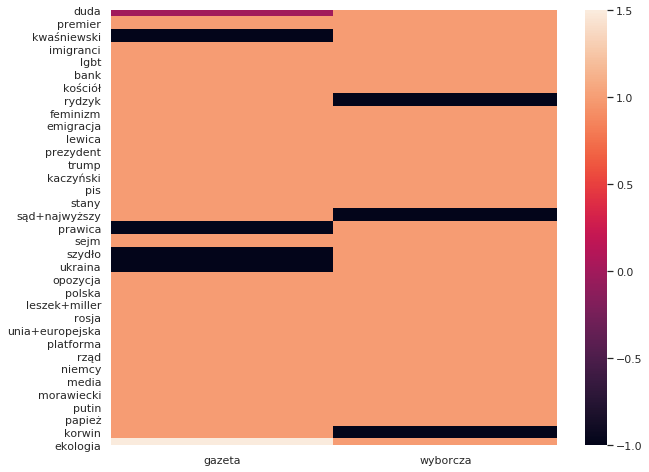

In [149]:
sns.heatmap(res)

In [139]:
res[res.index == 'feminizm']

,gazeta,wyborcza
feminizm,1.0,0.264706


## Regex